In [18]:
import h5py
from eeg_prep.network import state_lds_array
from eeg_prep.preprocess.ieeg import preprocess_ieeg
from eeg_prep.utils import compute_samplepoints
from eeg_prep.metrics.sourcesink import state_sourcesink_array
import numpy as np
import mne

import matplotlib.pyplot as plt


In [8]:

# Open the file and load the data
with h5py.File("/media/dan/Data/git/network_miner/understanding1/034_Baseline_As_01024_00001.jld2", "r") as f:
    # Access the dataset named "A_mats"
    A_mats_julia = f["A_mats"][:]

In [7]:
WINSIZE_MSEC = 500
STEPSIZE_MSEC = 500
edf_path = "/media/dan/Data/data/iEEG/raw_ieeg/baseline_patients/baseline_edfs/034_Baseline.EDF"

raw = mne.io.read_raw_edf(edf_path, verbose=False)
eeg_channels = [ch for ch in raw.ch_names if ch.startswith("EEG ")]


raw = mne.io.read_raw_edf(edf_path, preload=True, include=eeg_channels, verbose=False)
raw = raw.filter(l_freq=0.5, h_freq=300, verbose=True)
raw.info["line_freq"] = 60

raw = preprocess_ieeg(raw)

# average reference
raw = raw.set_eeg_reference(ref_channels="average", projection=False, verbose=False)

sfreq = raw.info["sfreq"]

# round to nearest sample
winsize_samps = int(np.round(WINSIZE_MSEC * (sfreq / 1000)))
stepsize_samps = int(np.round(STEPSIZE_MSEC * (sfreq / 1000)))

data = raw.get_data()

A_mats = state_lds_array(
data, winsize=winsize_samps, stepsize=stepsize_samps, l2penalty=0, progressbar=True
)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 300.00 Hz
- Upper transition bandwidth: 75.00 Hz (-6 dB cutoff frequency: 337.50 Hz)
- Filter length: 13517 samples (6.600 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.9s
Computing A matrices: 100%|██████████| 606/606 [00:28<00:00, 21.63it/s]


In [9]:
print(A_mats.shape)
print(A_mats_julia.shape)

(97, 97, 606)
(606, 97, 97)


In [24]:
A_mats_julia = np.moveaxis(A_mats_julia, 0, -1)
A_mats_julia = A_mats_julia.transpose(1, 0, 2)

In [25]:
print(A_mats.shape)
print(A_mats_julia.shape)

(97, 97, 606)
(97, 97, 606)


In [26]:
print(A_mats[0,:4,0])
print(A_mats_julia[0,:4,0])

[ 0.93022925 -0.02247776 -0.01962504 -0.01947471]
[ 0.88245818 -0.02048618  0.00217682  0.00382575]


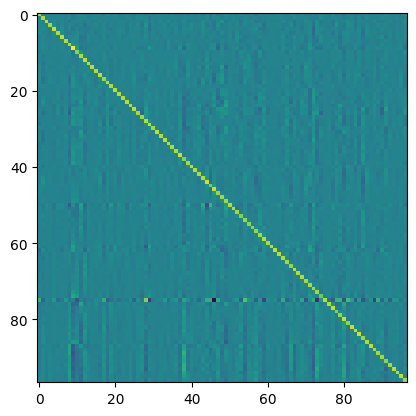

In [27]:
plt.imshow(A_mats[:,:,0])

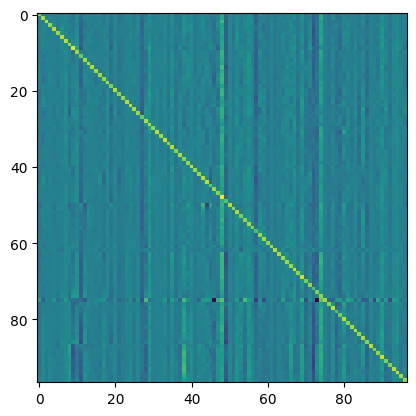

In [29]:
plt.imshow(A_mats_julia[:,:,0].T)